In [1]:
import numpy as np
import qutip as qp

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

0.9477083400392539


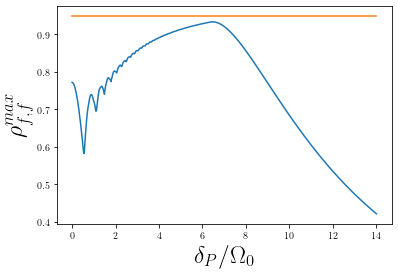

In [3]:
Omega_0=40.
H_d = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
H_D = Omega_0*qp.Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])
H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])

T=1.
time=np.linspace(0.,T,101)
psi0 = qp.fock_dm(4,0)

Gamma=10.
L = np.sqrt(Gamma)*qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,1,0,0]])

Delta=np.linspace(0., 14., 500)
p_g2=np.zeros(500)
for i in range(500):
    H=Delta[i]*H_D+H_p+H_s
    result=qp.mesolve(H, psi0, tlist=time, c_ops=[L])
    pg2t=np.zeros(500)
    for k in range(time.shape[0]):
        pg2t[k]=result.states[k][2,2].real
    p_g2[i]=pg2t.max()
    
plt.plot(Delta, p_g2)

r, C1, C2= 21.51569276, 5.113075417, -0.038411337000000004
m=0.2917104465

def fdelta(t, *args):
    global m, Omega_0
    return m*(t/T-0.5)
        
def fDelta(t, *args):
    global A, r, C1, C2, Omega_0
    return C1-C2*np.exp(r*(t/T-0.5)**2)

result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time, c_ops=[L])
r=np.zeros(500)
for i in range(500):
    r[i]=result.states[-1][2,2].real

plt.plot(Delta, r)
plt.ylabel(r"$\rho_{f,f}^{max}$", fontsize=24)
plt.xlabel(r"$\delta_P/\Omega_0$", fontsize=24)
print(r[-1])

Text(0.5, 0, '$\\delta_P/\\Omega_0$')

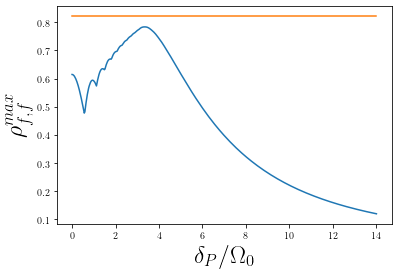

In [4]:
Omega_0=20.
H_d = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
H_D = Omega_0*qp.Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])
H_p = Omega_0*qp.Qobj([[0,0.5,0,0],[0.5,0,0,0],[0,0,0,0],[0,0,0,0]])
H_s = Omega_0*qp.Qobj([[0,0,0,0],[0,0,0.5,0],[0,0.5,0,0],[0,0,0,0]])

T=1.
time=np.linspace(0.,T,101)
psi0 = qp.fock_dm(4,0)

Gamma=10.
L = np.sqrt(Gamma)*qp.Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,1,0,0]])

Delta=np.linspace(0., 14., 500)
p_g2=np.zeros(500)
for i in range(500):
    H=Delta[i]*H_D+H_p+H_s
    result=qp.mesolve(H, psi0, tlist=time, c_ops=[L])
    pg2t=np.zeros(500)
    for k in range(time.shape[0]):
        pg2t[k]=result.states[k][2,2].real
    p_g2[i]=pg2t.max()
    
plt.plot(Delta, p_g2)

r= 21.51569276
C1, C2= 46.76166804/20.,  -0.76822674/20.
m=11.691655261888883/20.

def fdelta(t, *args):
    global m, Omega_0
    return m*(t/T-0.5)
        
def fDelta(t, *args):
    global A, r, C1, C2, Omega_0
    return C1-C2*np.exp(r*(t/T-0.5)**2)

result=qp.mesolve([[H_d, fdelta],[H_D, fDelta],H_p,H_s], psi0, tlist=time, c_ops=[L])
r=np.zeros(500)
for i in range(500):
    r[i]=result.states[-1][2,2].real

plt.plot(Delta, r)

plt.ylabel(r"$\rho_{f,f}^{max}$", fontsize=24)
plt.xlabel(r"$\delta_P/\Omega_0$", fontsize=24)